<a href="https://colab.research.google.com/github/agrim-sri/IITD-AIA_FSM/blob/main/supervisedTraining_classification_AIAFSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('gender_submission.csv')


In [ ]:
x_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
x_test = df_test.values


**Naive Bayes** *algorithm from scratch.*

  Args:
    x_train: The training features.
    y_train: The training labels.

  Returns:
    A model that can be used to make predictions.

In [ ]:
def naive_bayes(x_train, y_train):
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_probabilities = class_counts / len(y_train)

    # feature probabilities
    feature_probabilities = {}
    for feature_index in range(x_train.shape[1]):
        feature_values = np.unique(x_train[:, feature_index])
        feature_probabilities[feature_index] = {}
        for class_value in classes:
            class_samples = x_train[y_train == class_value]
            class_feature_counts = np.sum(np.isin(class_samples[:, feature_index], feature_values), axis=0)
            feature_probabilities[feature_index][class_value] = (class_feature_counts + 1) / (len(class_samples) + len(feature_values))

    return class_probabilities, feature_probabilities

**K-Nearest Neighbors** algorithm from scratch.


  Args:
    x_train: The training features.
    y_train: The training labels.
    k: The number of neighbors to consider.

  Returns:
    A model that can be used to make predictions.

In [ ]:
def knn(x_train, y_train, x_test, k):
    # distance between each test sample and training samples
    distances = np.sqrt(np.sum((x_train[:, np.newaxis] - x_test) ** 2, axis=2))

    # k nearest neighbors for each test
    nearest_indices = np.argsort(distances, axis=0)[:k]

    nearest_labels = y_train[nearest_indices]

    y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=nearest_labels)

    return y_pred

In [ ]:
class_probabilities, feature_probabilities = naive_bayes(x_train, y_train)
y_pred = knn(x_train, y_train, x_test, k)


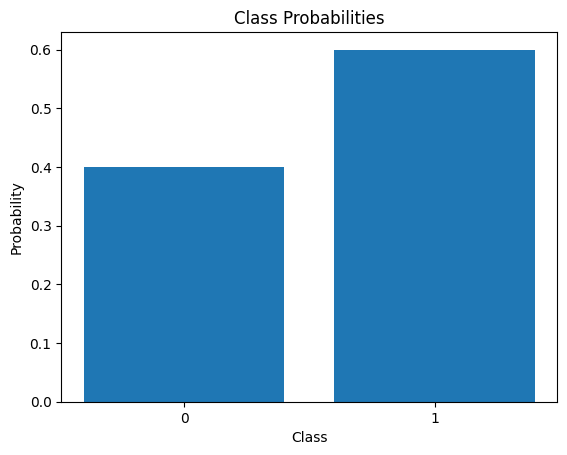

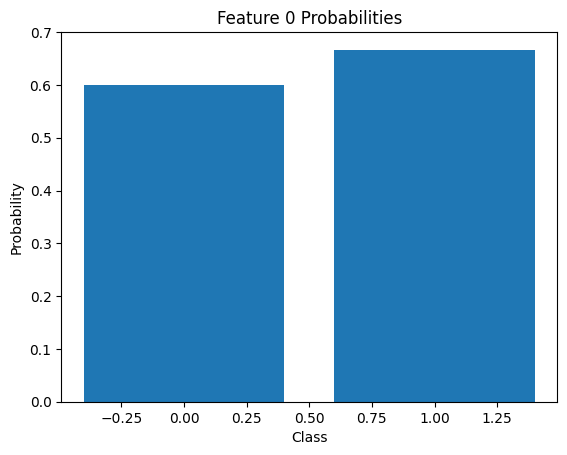

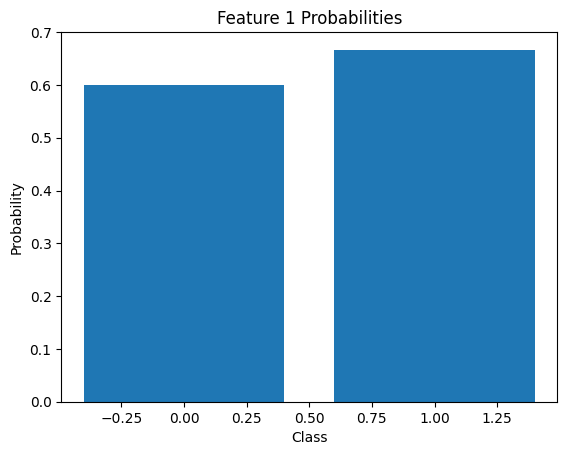

In [ ]:
plt.bar(range(len(class_probabilities)), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Class Probabilities")
plt.xticks(range(len(class_probabilities)))
plt.show()

# Plot
for feature_index, probabilities in feature_probabilities.items():
    labels = list(probabilities.keys())
    values = list(probabilities.values())
    plt.bar(labels, values)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.title(f"Feature {feature_index} Probabilities")
    plt.show()